# Plausible web analysis

In [68]:
%load_ext autoreload
%autoreload 2

import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from hsfparana.mpl_utils import set_date_xaxis
from hsfparana.colors import iris_hep_colors as colors
import scienceplots

plt.style.use("science")
plt.style.use("notebook")

data_dir = Path(".").resolve().parent / "data" / "plausible"
assert data_dir.is_dir()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
pages = pd.read_csv(data_dir / "pages.csv")
visitors = pd.read_csv(data_dir / "visitors.csv", parse_dates=["date"])

In [70]:
visitors.shape

(48, 5)

In [71]:
visitors.tail()

,date,visitors,pageviews,bounce_rate,visit_duration
43,2024-03-11,4335,7090,84.0,77.0
44,2024-03-18,4193,6453,85.0,65.0
45,2024-03-25,3897,5829,84.0,67.0
46,2024-04-01,4044,6183,85.0,63.0
47,2024-04-08,3684,5656,85.0,67.0


In [72]:
# Exclude potential leading partial row
visitors = visitors.query("visitors > 1000").copy()
dates = visitors.date.tolist()
dates += [dates[-1] + datetime.timedelta(days=7)]

In [75]:
dates[-1]

Timestamp('2024-04-15 00:00:00')

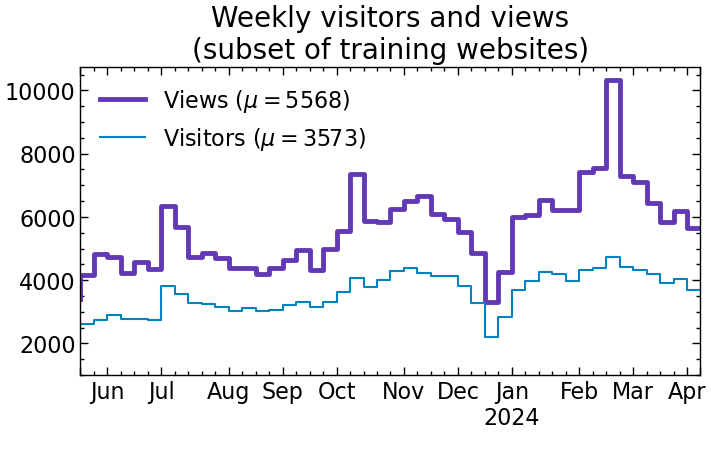

In [125]:
fig,ax = plt.subplots(figsize=(8,4))
visitors.plot(x='date',y='pageviews',ax=ax,
                                         drawstyle= 'steps',color=colors[0],
                                         lw=3.5,
                                         label=rf"Views ($\mu={visitors.pageviews.mean():.0f}$)",
)

visitors.plot(x='date',y='visitors',ax=ax, 
                                    drawstyle ='steps',
                                    color=colors[1],
                                    lw=1.5,
                                    label=rf"Visitors ($\mu={visitors.visitors.mean():.0f}$)",
)

# set_date_xaxis(ax, start_date=str(dates[0]), end_date=dates[-1])

ax.set_ylim(1000)
ax.set_xlabel(" ")
ax.set_title("Weekly visitors and views\n(subset of training websites)",fontsize=20)
fig.savefig("plausible.png",dpi=200)


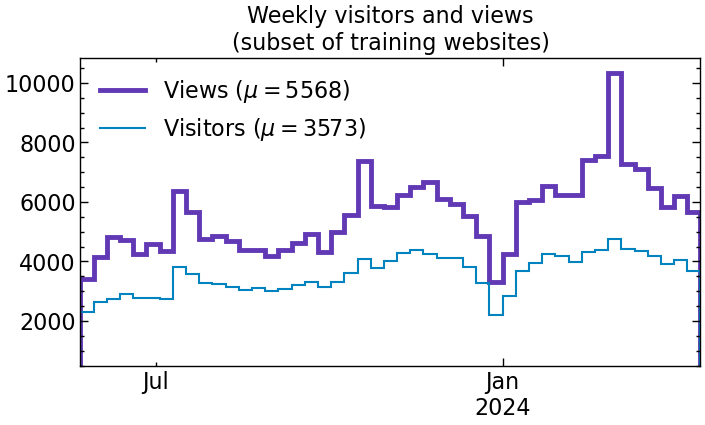

In [122]:
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.stairs(
#     visitors.pageviews,
#     edges=dates,
#     lw=3.5,
#     label=f"Views ($\\mu={visitors.pageviews.mean():.0f}$)",
#     color=colors[0],
# )
# ax.stairs(
#     visitors.visitors,
#     edges=dates,
#     lw=1.5,
#     label=f"Visitors ($\\mu={visitors.visitors.mean():.0f}$)",
#     color=colors[1],
# )
# set_date_xaxis(ax, start_date=str(dates[0]), end_date=dates[-1])
# ax.legend()
# ax.set_ylim(500, None)
# ax.set_title("Weekly visitors and views\n(subset of training websites)", fontsize=16)
# fig.savefig("plausible.png",dpi=200)